# Iris dataset example

In [1]:
import pandas as pd
from sklearn.manifold import TSNE as sklearn_TSNE
import huddles

## Load the data
Source: https://www.kaggle.com/datasets/uciml/iris

In [4]:
full_data = pd.read_csv("../datasets/Iris.csv").drop(["Id"], axis=1)
input_data = full_data.copy(deep=True).drop(["Species"], axis=1)
targets = full_data.copy(deep=True)["Species"]

In [5]:
print(f"Shape of the data: {input_data.shape}")
input_data.head()

Shape of the data: (150, 4)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
targets = targets.astype("category")
print(f"Shape of the target: {targets.shape}")
targets.value_counts(dropna=None)

Shape of the target: (150,)


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Create a 2D embedding with t-SNE

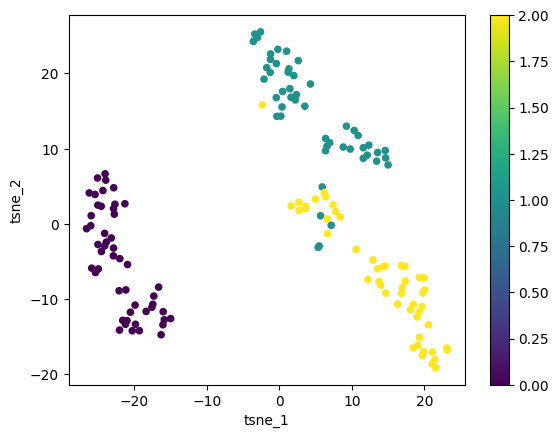

In [25]:
embedded_data = sklearn_TSNE(
    n_components=2,
    n_iter=500,
    perplexity=10,
    n_jobs=-1,
).fit_transform(input_data)

embedded_data = pd.DataFrame(embedded_data, columns=["tsne_1", "tsne_2"])
embedded_data = pd.concat([embedded_data, targets], axis=1)

_ = embedded_data.plot.scatter(x="tsne_1", y="tsne_2", c=targets.cat.codes, colormap="viridis")

## Explore 2D embeddings

In [ ]:
# import numpy as np
# import pandas as pd
# import altair as alt


# def plot_text(
#     embeddings_2d, dataset, color_array=None, color_words=None, disable_warning=True
# ):
#     # """
#     # # Make a visualisation to help find clues in text data.

#     # # Arguments:
#     # #     - `X`: the numeric features, should be a 2D numpy array
#     # #     - `texts`: list of text data
#     # #     - `color_words`: list of words to highlight
#     # #     - `color_array`: an array that represents color for the plot
#     # #     - `disable_warning`: disable the standard altair max rows warning
#     # # """
#     if disable_warning:
#         alt.data_transformers.disable_max_rows()

#     if len(dataset) != embeddings_2d.shape[0]:
#         raise ValueError(
#             f"The number of text examples ({len(dataset)}) should match X array ({embeddings_2d.shape[0]})."
#         )

#     df_ = pd.concat([embeddings_2d, dataset], axis=1)

#     if color_array is not None:
#         if len(color_array) != embeddings_2d.shape[0]:
#             raise ValueError(
#                 f"The number of color array ({len(color_array)}) should match X array ({embeddings_2d.shape[0]})."
#             )
#         df_ = df_.assign(color=color_array)

#     if color_words:
#         df_ = df_.assign(color="none")

#         for w in color_words:
#             predicate = df_["text"].str.lower().str.contains(w)
#             df_ = df_.assign(color=lambda d: np.where(predicate, w, d["color"]))

#     brush = alt.selection_interval()

#     p1 = (
#         alt.Chart(df_)
#         .mark_circle(opacity=0.6, size=20)
#         .encode(
#             x=alt.X("x1", axis=None, scale=alt.Scale(zero=False)),
#             y=alt.Y("x2", axis=None, scale=alt.Scale(zero=False)),
#             tooltip=["text"],
#         )
#         .properties(width=350, height=350, title="embedding space")
#         .add_params(brush)
#     )

#     if color_words:
#         p1 = (
#             alt.Chart(df_)
#             .mark_circle(opacity=0.6, size=20)
#             .encode(
#                 x=alt.X("x1", axis=None, scale=alt.Scale(zero=False)),
#                 y=alt.Y("x2", axis=None, scale=alt.Scale(zero=False)),
#                 tooltip=["text"],
#                 color=alt.Color("color", sort=["none"] + color_words),
#             )
#             .properties(width=350, height=350, title="embedding space")
#             .add_params(brush)
#         )

#     if color_array is not None:
#         p1 = (
#             alt.Chart(df_)
#             .mark_circle(opacity=0.6, size=20)
#             .encode(
#                 x=alt.X("x1", axis=None, scale=alt.Scale(zero=False)),
#                 y=alt.Y("x2", axis=None, scale=alt.Scale(zero=False)),
#                 # tooltip=["text"],
#                 color=alt.Color("color"),
#             )
#             .properties(width=350, height=350, title="embedding space")
#             .add_params(brush)
#         )

#     p2 = (
#         alt.Chart(df_)
#         .mark_text()
#         .encode(
#             x=alt.X("r", axis=None),
#             y=alt.Y("row_number:O", axis=None),
#             text="trunc_text:N",
#         )
#         .transform_window(row_number="row_number()")
#         .transform_filter(brush)
#         .transform_window(rank="rank(row_number)")
#         .transform_filter(alt.datum.rank < 18)
#         .properties(title="text")
#     )

#     return (p1 | p2).configure_axis(grid=False).configure_view(strokeWidth=0)


# # def _single_scatter_chart(df_, idx, brush, title="embedding space"):
# #     cols = ("x1:Q", "y1:Q") if idx == 1 else ("x2:Q", "y2:Q")
# #     return (
# #         alt.Chart(df_)
# #         .mark_circle(opacity=0.6, size=20)
# #         .encode(
# #             x=alt.X(cols[0], axis=None, scale=alt.Scale(zero=False)),
# #             y=alt.Y(cols[1], axis=None, scale=alt.Scale(zero=False)),
# #             color=alt.condition(brush, "id:O", alt.value("lightgray"), legend=None),
# #             tooltip=["text"],
# #         )
# #         .properties(width=350, height=350, title=title)
# #         .add_params(brush)
# #     )


# plot_text(embeddings_2d=embedded_data, dataset=full_data)

In [ ]:
# huddler.interactive_plot(embeddings_2d=embedded_data, dataset=full_data)